## Importing libraries

In [1]:
from sklearn.cluster import KMeans              #Kmeans classifier 
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter                  #To extract the count
from skimage.color import rgb2lab, deltaE_cie76  #convert rgb to lab and determine similarity
import os
import webcolors                                 #Converting hex value to actual color names

%matplotlib inline

## Displaying the image in different color formats

Shape: (664, 1000, 3)


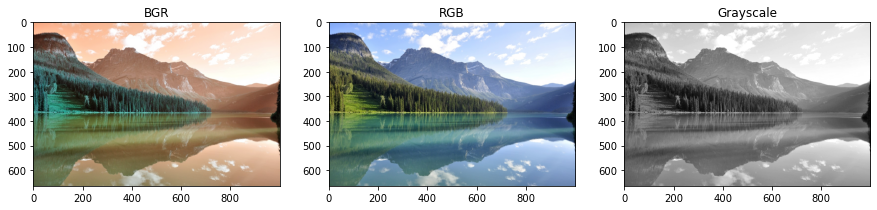

In [11]:
image = cv2.imread('images/nature.jpg')
print("Shape: {}".format(image.shape))

plt.figure(figsize=(15,15)) 
plt.subplot(1,3,1)
plt.title("BGR")
plt.imshow(image)                                     #BGR color

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1,3,2)
plt.title("RGB")
plt.imshow(image)                                     #RGB color

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1,3,3)
plt.title("Grayscale")
plt.imshow(gray_image, cmap='gray')                   #Grey scale

## Resizing the image

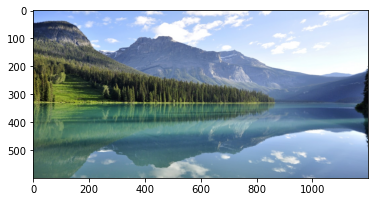

In [12]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## Color identification

In [3]:
def rgb_to_hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [13]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [14]:
def get_colors(image, number_of_colors, show_chart):
    
    image_m = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    image_m = image_m.reshape(image_m.shape[0]*image_m.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(image_m)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([65.64173243, 85.98425399, 70.60326665]),
 array([174.6269878 , 201.41232052, 243.57143739]),
 array([102.3104138 , 131.9517268 , 159.33429735]),
 array([30.91292911, 38.44528476, 33.58351966]),
 array([231.11145097, 240.50150366, 252.90343144]),
 array([133.75692892, 160.50793473, 188.04403219]),
 array([ 65.90959928,  99.10447639, 118.39769224]),
 array([107.77293891, 129.9794949 ,  90.11075577])]

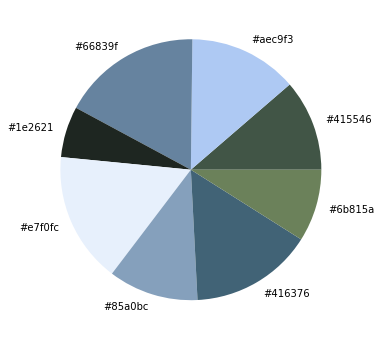

In [15]:
get_colors(get_image('images/nature.jpg'), 8, True)

In [16]:
pip install webcolors==1.3

  Created wheel for webcolors: filename=webcolors-1.3-py3-none-any.whl size=13013 sha256=5ecb17361ad2871a1fa93ac78b31dabfb25d9bfa4c11968bb24ca8b7a0cd1359
  Stored in directory: c:\users\5406\appdata\local\pip\cache\wheels\3b\f9\51\79edcba09c0ea91cfa6cefca1687ba45ae8399b5fa28ed122f
Successfully built webcolors
Note: you may need to restart the kernel to use updated packages.


In [5]:
webcolors.hex_to_name('#000080')

'navy'